## Question 01

![Alt text](q1_1.png)

![Alt text](q1_2.png)

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt

class throw_LN:
    def __init__(self, X, Y) -> None:
        self.X = np.c_[np.ones(X.shape[0]), X, np.power(X, 2)]
        self.Y = Y.reshape(-1, 1)
        self.G = 9.81
    
    def fit(self):
        A = np.matmul(self.X.T,self.X)
        b = np.matmul(self.X.T,self.Y)
        self.betha = np.linalg.solve(A, b)
    
    def predict(self, X):
        return X @ self.betha
    
    def plot(self):
        fig, ax = plt.subplots()
        Xs = np.linspace(0, 20, 10)
        Xs = np.c_[np.ones(Xs.shape[0]), Xs, np.power(Xs, 2)]
        Ys = self.predict(Xs)
        ax.plot(Xs[:, 1], Ys, label="fit", c='b')
        ax.scatter(self.X[:,1], self.Y, label="data", c='r')
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_xlim(-2, 22)
        plt.legend()
        plt.show()

In [35]:
X = np.array([5,10,15,20])
Y = np.array([3.8,4.3,3.0,0])
regressor = throw_LN(X, Y)
regressor.fit()
print(regressor.betha)

[[ 1.575]
 [ 0.621]
 [-0.035]]


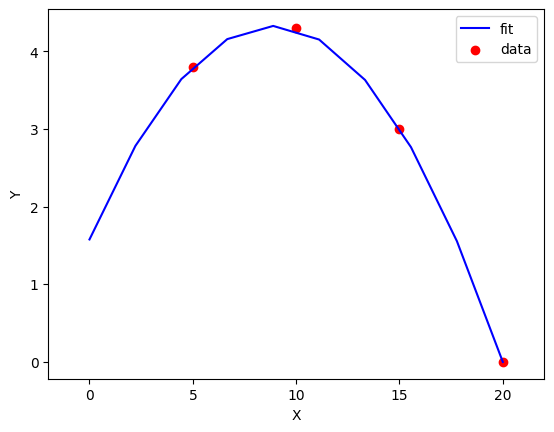

In [36]:
regressor.plot()


In [38]:
bethas = regressor.betha.squeeze()
g = 9.81
y_0 = bethas[0]
theta_0 = np.arctan(bethas[1])
v_0 = np.sqrt(-g/(2*bethas[2]*np.cos(theta_0)**2))
mae = np.sum(np.abs(
    np.array([y_0 , theta_0, v_0]), np.array([1.8, np.deg2rad(30), 14])
))
print(mae)

16.065842018994456


## Question 2

For the below dataset. Try to build an ensemble model using logistic regression. You have to select subset of features and instances and fit a logistic regression model. You can take number of logistic regression models to be 10. To get final output, perform soft voting (take the average of the probabilities and then apply the thereshold)

Note: You can use sklearn for this part

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the dataset into a pandas DataFrame
diabetes_data = pd.read_csv('diabetes.csv', header=0, index_col=None)
Xs = diabetes_data.iloc[:, :-1]
Ys = diabetes_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.33, random_state=42)


In [58]:
models = []
features = Xs.columns
for i in range(10):
    selected_features = features[
        np.random.choice(
            range(0, len(features)), size=4, replace=False
        )
    ]
    model = LogisticRegression(penalty='l2')
    model.fit(X_train.loc[:, selected_features], y_train)
    models.append((model, selected_features))

In [68]:
probs = []
for model, selected_features in models:
    probs.append(
        model.predict_proba(X_test.loc[:, selected_features])
    )
probs = np.array(probs)
probs = np.average(probs, axis=0)
probs = np.argmax(probs, axis=-1)
print(accuracy_score(y_test, probs))

0.7598425196850394


## Question 3

For the below data, fit a SVM model to dataset. Later, transform the features using PCA to 2-D and then perform SVM. Compare the performance between the two approaches. Do not forget to scale the features before applying PCA. (Use Sklearn) 

In [71]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [72]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
acc = accuracy_score(y_test, 
                    svm.predict(X_test))
print(acc)

0.711864406779661


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_scaled)
X_test_2D = pca.transform(X_test_scaled)
svm = SVC()
svm.fit(X_train_2D, y_train)
acc = accuracy_score(y_test, 
                    svm.predict(X_test_2D))
print(acc)

1.0
